In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as ak
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
Data=pd.read_csv('DS_01.csv')
Data

,Transaction_date,House_Age,Distance_from_nearest_Metro_station_km,Number_of_convenience_stores,latitude,longitude,Number_of_bedrooms,House_size_sqft,House_price_of_unit_area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


In [3]:
Data.head()


,Transaction_date,House_Age,Distance_from_nearest_Metro_station_km,Number_of_convenience_stores,latitude,longitude,Number_of_bedrooms,House_size_sqft,House_price_of_unit_area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Transaction_date                        414 non-null    float64
 1   House_Age                               414 non-null    float64
 2   Distance_from_nearest_Metro_station_km  414 non-null    float64
 3   Number_of_convenience_stores            414 non-null    int64  
 4   latitude                                414 non-null    float64
 5   longitude                               414 non-null    float64
 6   Number_of_bedrooms                      414 non-null    int64  
 7   House_size_sqft                         414 non-null    int64  
 8   House_price_of_unit_area                414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [5]:
Data.describe()

,Transaction_date,House_Age,Distance_from_nearest_Metro_station_km,Number_of_convenience_stores,latitude,longitude,Number_of_bedrooms,House_size_sqft,House_price_of_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


What can we infer from the above describe function ?

1.Look at the bedroom columns , the dataset has a house where the house has 43 bedrooms , seems to be a massive house and would be interesting to know more about it as we progress.
2.Maximum square feet is 1500 where as the minimum is 402. we can see that the data is distributed.

In [6]:
Data.shape

(414, 9)

In [7]:
Data.corr()

,Transaction_date,House_Age,Distance_from_nearest_Metro_station_km,Number_of_convenience_stores,latitude,longitude,Number_of_bedrooms,House_size_sqft,House_price_of_unit_area
Transaction_date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.061995,0.068437,0.087491
House_Age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567
Distance_from_nearest_Metro_station_km,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613
Number_of_convenience_stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005
latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307
longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287
Number_of_bedrooms,0.061995,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265
House_size_sqft,0.068437,-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489
House_price_of_unit_area,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000


Which is the most common house (Bedroom wise) ?

<Figure size 1000x1000 with 0 Axes>

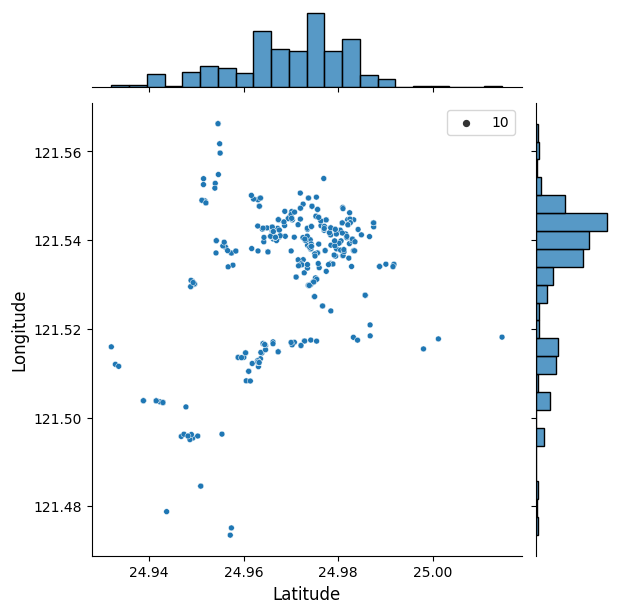

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [8]:
plt.figure(figsize=(10,10))
sns.jointplot(x=Data.latitude.values, y=Data.longitude,size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

 common factors are affecting the price of the houses

Text(0.5, 1.0, 'Price vs square Feet')

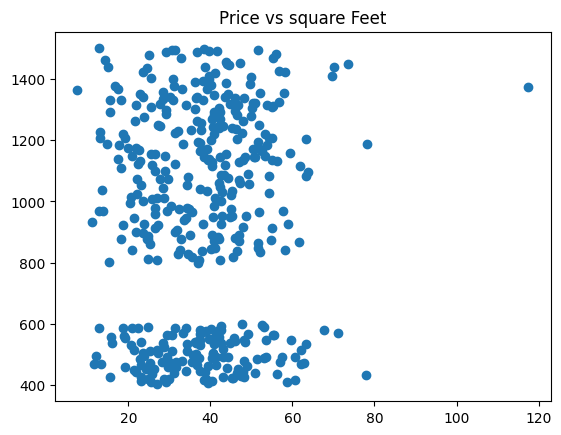

In [9]:
plt.scatter(Data.House_price_of_unit_area , Data.House_size_sqft)
plt.title("Price vs square Feet")

Text(0.5, 1.0, 'Price vs Location of the houses')

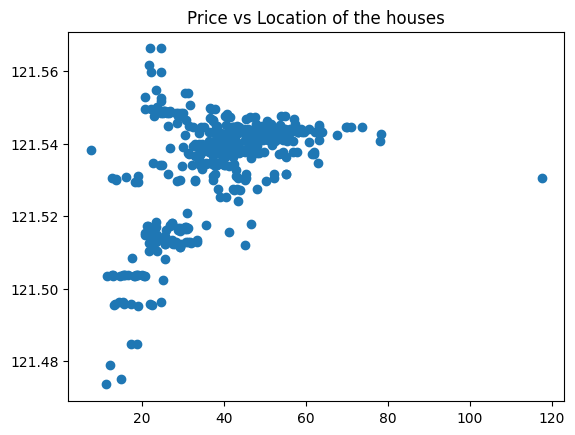

In [10]:
plt.scatter(Data.House_price_of_unit_area , Data.longitude)
plt.title("Price vs Location of the houses")

Text(0.5, 1.0, 'Price vs Location of the houses')

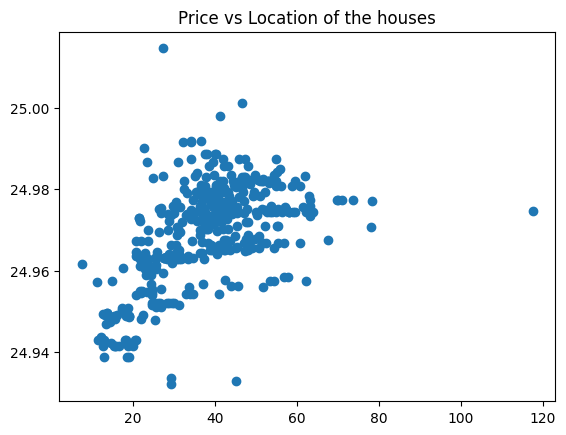

In [11]:
plt.scatter(Data.House_price_of_unit_area , Data.latitude)
plt.title("Price vs Location of the houses")

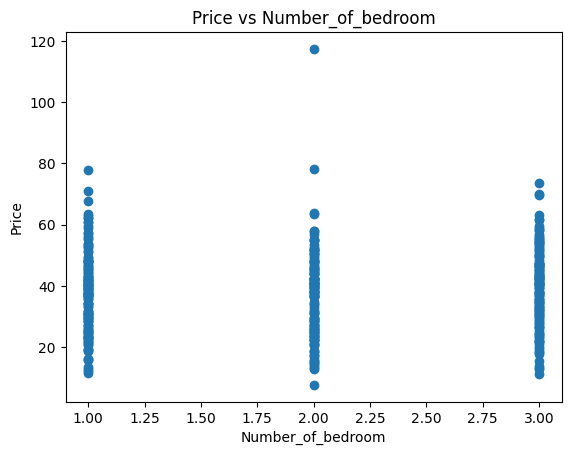

In [12]:
plt.scatter(Data.Number_of_bedrooms, Data.House_price_of_unit_area)
plt.title("Price vs Number_of_bedroom")
plt.xlabel('Number_of_bedroom')
plt.ylabel('Price')
plt.show()

We can see more factors affecting the price

Text(0.5, 1.0, 'Price vs House age')

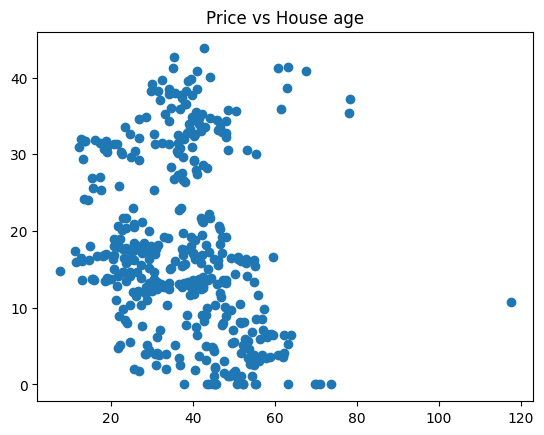

In [13]:
plt.scatter(Data.House_price_of_unit_area,Data.House_Age )
plt.title("Price vs House age")

Text(0.5, 1.0, 'Price vs Distance_from_nearest_Metro_station_km')

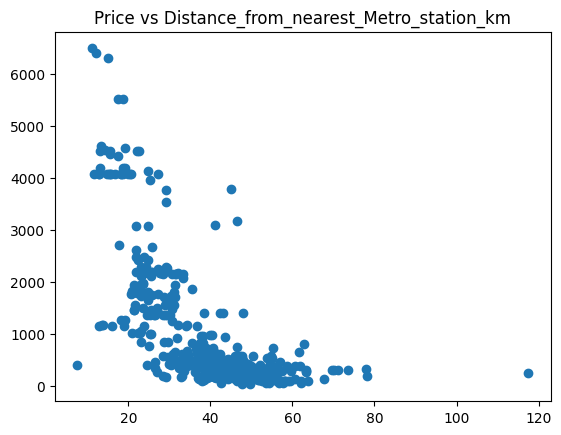

In [14]:
plt.scatter(Data.House_price_of_unit_area,Data.Distance_from_nearest_Metro_station_km)
plt.title("Price vs Distance_from_nearest_Metro_station_km")

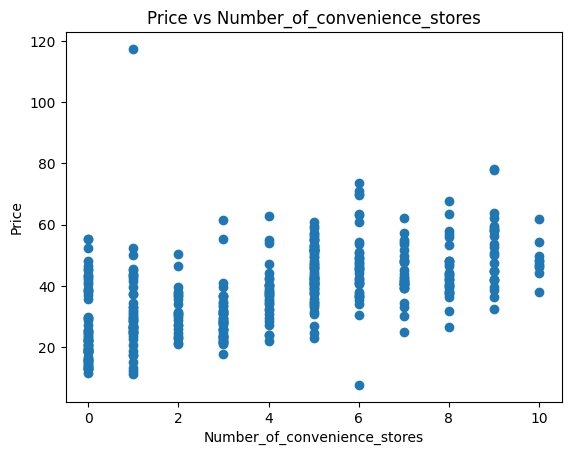

In [15]:
plt.scatter(Data.Number_of_convenience_stores,Data.House_price_of_unit_area)
plt.title("Price vs Number_of_convenience_stores")
plt.xlabel('Number_of_convenience_stores')
plt.ylabel('Price')
plt.show()

In [16]:
Data.head()

,Transaction_date,House_Age,Distance_from_nearest_Metro_station_km,Number_of_convenience_stores,latitude,longitude,Number_of_bedrooms,House_size_sqft,House_price_of_unit_area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


Linear Regression

In [17]:
import mpl_toolkits
%matplotlib inline

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
reg=LinearRegression()

In [21]:
labels = Data['House_price_of_unit_area']
conv_dates=[1 if values == 2013.583 else 0 for values in Data.Transaction_date]
Data['date']=conv_dates
train1=Data.drop['Number_of_bedrooms','House_price_of_unit_area'], axis=1

TypeError: cannot unpack non-iterable int object

In [22]:
from sklearn.cross_validation import train_test_split

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [ ]:
x_train, x_test, y_train, y_test =train_test_split(train1,labels,test_size=0.10,random_state=2)

In [ ]:
reg.fit(x_train,y_train)

NameError: name 'x_train' is not defined

In [ ]:
reg.score(x_test,y_test)

NameError: name 'x_test' is not defined

In [ ]:
from sklearn import ensemble
clf=ensemble.GradientBoostingClassifier(n_estimators=400, max_depth=5,min_samples_split=2,learning_rate=0.1,loss='ls')


In [ ]:
clf.fit(x_train,y_traing)

In [ ]:
GradientBoostingRegressor(alpha=0.9,criterion='friedman_mse',init=None,learing_rate=0.1, loss='ls',depth=5,
max_features=None,min_samples_leaf=1, min_samples_split=2, min_wieght_fraction_leaf=0.0, n_estimators=400,presot='auto',
random_state=None, subsample=1.0,verbose=0,warm_start=False)

NameError: name 'GradientBoostingRegressor' is not defined

In [ ]:
clf.score(x_test,y_test)

NameError: name 'clf' is not defined

Text(0, 0.5, 'Count')

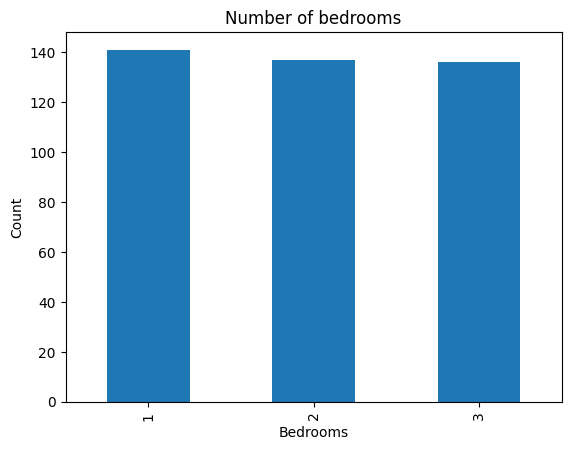

In [ ]:
Data['Number of bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')

Looking at the bedroom columns , the dataset has a house where the house has 33 bedrooms , seems to be a massive house and would be interesting to know more about it as we progress.
Maximum square feet is 13,450 where as the minimum is 290. we can see that the data is distributed.


In [ ]:
plt.scatter('Data.price,Data.sqft_living')
plt.title('please reframe')

TypeError: scatter() missing 1 required positional argument: 'y'